## $\Delta H$ and $\mu_{JT}$

### A very short introduction
(This needs a little more work)

In general, it's perfectly correct to write

$$
\Delta H_{rxn} = \Delta H_{rxn}^o + \Delta(\Delta H_{rxn}) \ \ \ (1)
$$

Evaluating $\Delta(\Delta H_{rxn})$ depends on the path we're interested in taking. For isobaric changes in temperature, we would say 

$$
\Delta(\Delta H_{rxn}) = \int_{T^o}^{T'} \Delta C_P dT \ \ \ (2)
$$

which, under some circumstances, we could reasonably approximate as

$$
\Delta(\Delta H_{rxn}) \approx \Delta C_P \Delta T \ \ \ (3)
$$

For isothermal changes in pressure, by contrast, we would say 

$$
\Delta(\Delta H_{rxn}) = \int_{P^o}^{P'} \Delta \mu_T dP \ \ \ (4)
$$

which, under some circumstances, we could reasonably approximate as

$$
\Delta(\Delta H_{rxn}) \approx \Delta \mu_T \Delta P \ \ \ (5)
$$


In [1]:
import numpy as np
import sympy as sp
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
%matplotlib notebook

## 1. Enthalpy of fusion of water at 271 K
We know that, for water, $\Delta H_{fus}=6.0 \ {kJ \over mol}$ at $273 \ K$). But ice in equilibrium with sea water is expected to have a temperature of -2 C, or 271 K, so we can expect its enthalpy of fusion to be different. 

### Analytical goal
Based on what you know about $H(T)$ for water in its three forms, predict whether the enthalpy of fusion should be bigger or smaller at 271 K (compared to 273 K). This will help you verify that your numerical result is correct.

### Numerical goal
Calculate $\Delta H_{fus}$ of water at 271 K. You can assume constant heat capacities (done for you at the top of the cell). Give your result in ${kJ \over mol}$.

In [7]:
# Assuming constant heat capacities
CP_liq = AssignQuantity(75.4,'J/mol/K')
CP_ice = AssignQuantity(38,'J/mol/K')

### BEGIN SOLUTION

DeltaCP = CP_liq-CP_ice; print(DeltaCP)
DeltaT = AssignQuantity(271 - 273,'K')
DeltaDelta = DeltaCP*DeltaT; 
print(DeltaDelta)

DeltaHfus0 = AssignQuantity(6,'kJ/mol')

DeltaHfus271 = DeltaHfus0 + DeltaDelta
print('Delta H(fus) at 271 K =', DeltaHfus271)

### END SOLUTION

37.400000000000006 joule / kelvin / mole
-74.80000000000001 joule / mole
Delta H(fus) at 271 K = 5.9252 kilojoule / mole


## 2. Enthalpy of sublimation of water at 218 K
At 218 K, Mars is much colder than Earth -- far below the triple point temperature of ice. So we don't expect any liquid water on the surface of Mars (now). But there *are* what appear to be ice caps in the polar regions of Mars, which grow and retreat with the Martian seasons. As thermodynamicists, we'd like to know the enthalpy of sublimation of water ice under those conditions.

### Analytical goal
Based on what you know about $H(T)$ for water in its three forms, predict whether the enthalpy of sublimation should be bigger or smaller at 218 K (compared to 273 K).

### Numerical goal
Calculate the enthalpy of sublimation of water at 218 K. You can assume constant heat capacities. A good source for reference values for water is https://en.wikipedia.org/wiki/Water_(data_page). 

In [4]:
# Assuming constant heat capacities
CP_gas = AssignQuantity(33.6,'J/mol/K')
CP_ice = AssignQuantity(38,'J/mol/K')

### BEGIN SOLUTION
DeltaCP = CP_gas-CP_ice; print(DeltaCP)
DeltaT = AssignQuantity(218 - 273,'K')
DeltaDelta = DeltaCP*DeltaT; 
print(DeltaDelta)

DeltaHsub0 = AssignQuantity(51.1,'kJ/mol')

DeltaHsub218 = DeltaHsub0 + DeltaDelta
print('Delta H(sub) at 218 K =', DeltaHsub218)

### END SOLUTION

-4.399999999999999 joule / kelvin / mole
241.99999999999991 joule / mole
Delta H(sub) at 218 K = 51.342 kilojoule / mole


## 3. Pressure dependence of the enthalpy of vaporization
For water vapor, the vdw formula for the isothermal Joule-Thomson coefficient is $\mu_T(gas) \approx b-{2a \over RT}$. For liquid water, we can say $\mu_T \approx b/3$. These are both on a *per mole* basis.

### Analytical goals
First, based on what you know about $H(T)$ for water in its three forms, predict whether the enthalpy of vaporization should be bigger or smaller at a higher pressure (compared to 1 atm). Here's a big hint: $\mu_T(gas)$ is much bigger in magnitude than $\mu_T(liq)$, and negative, at this temperature.

Second, derive an analytical expression for $\Delta(\Delta H_{vap})$ when the pressure is raised from a starting pressure (call it $P_1$) to a new pressure ($P_2$), assuming the above dependence of the Joule-Thomson coefficients on vdw parameters $a$ and $b$.

### Numerical goal
Using your result above, calculate $\Delta(\Delta H_{vap})$ when one mole of water is taken from 1 atm to 10 atm, at 273 K. Put your results in $kJ \over mol$. One way to check your result: the sign of $\Delta(\Delta H_{vap})$ should be consistent with the prediction you made above.

Analytical results ...
gas mu_T: b*n - 2*a*n/(R*T)
liq mu_T: b*n/3
Delta(mu_T): 2*b*n/3 - 2*a*n/(R*T)
Delta(Delta):
  ⎛2⋅b⋅n   2⋅a⋅n⎞
P⋅⎜───── - ─────⎟
  ⎝  3      R⋅T ⎠
Delta(Delta):
     ⎛2⋅b⋅n   2⋅a⋅n⎞      ⎛2⋅b⋅n   2⋅a⋅n⎞
- P₁⋅⎜───── - ─────⎟ + P₂⋅⎜───── - ─────⎟
     ⎝  3      R⋅T ⎠      ⎝  3      R⋅T ⎠


Numerical results ...
5.536 bar * liter ** 2 / mole ** 2
0.03049 liter / mole
R = 8.314 joule / kelvin / mole
273 kelvin
n = 1 mole
Tinv =  4367.758651037939 kelvin
DeltaDelta H =  -0.42631251551200955 kilojoule / mole


/home/instructor/pchem/source/Week_08.DeltaHAndMuJT/PchemLibrary.py:253: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  Fgrid[i,:] = integral_along_y


<IPython.core.display.Javascript object>


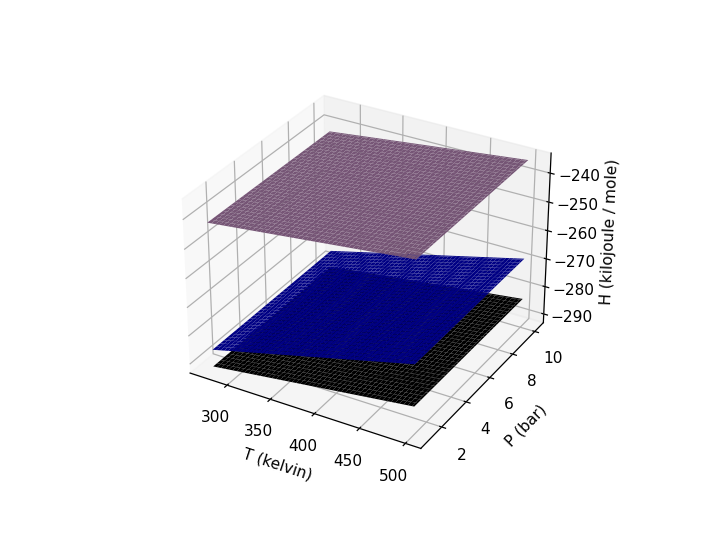

<IPython.core.display.Javascript object>


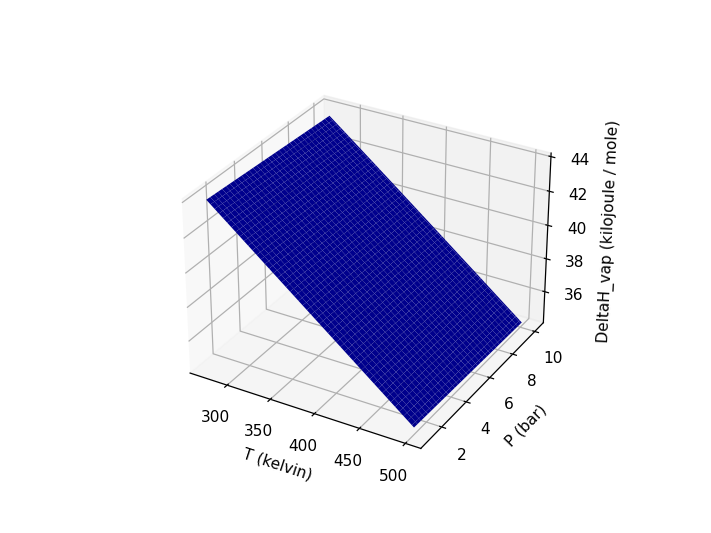

<IPython.core.display.Javascript object>


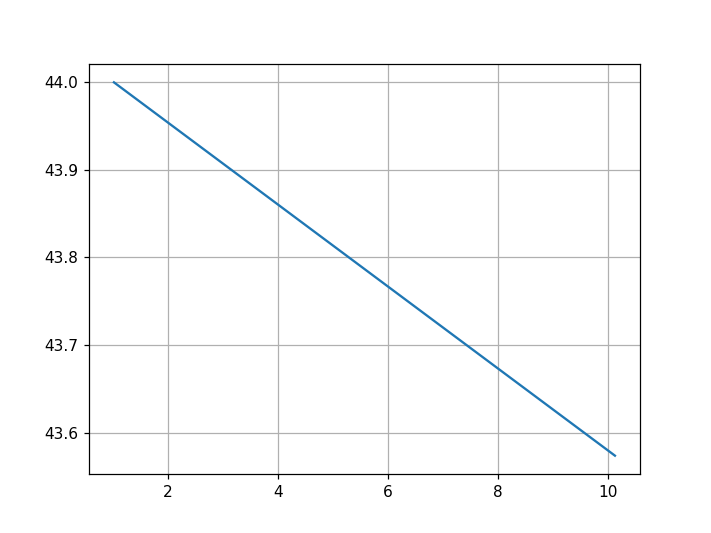

Checking at  273.0 kelvin 1.0132500000000002 bar
-242.0 kilojoule / mole -286.0 kilojoule / mole
DeltaH0:  44.0 kilojoule / mole
Checking at  273.0 kelvin 10.132500000000002 bar
-242.41704431776202 kilojoule / mole -285.99073180225 kilojoule / mole
DeltaH0: 43.573687484488005 kilojoule / mole
Trend
DeltaDeltaH =  -0.4263125155119951 kilojoule / mole


/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [8]:
### BEGIN SOLUTION ###

# Analytical work
print('Analytical results ...')
sp.var("a")
sp.var("b")
sp.var("n")
sp.var("R")
sp.var("T")
sp.var("P")
sp.var("P1")
sp.var("P2")
mu_T_gas = b*n - 2*a*n/(R*T); print('gas mu_T:', mu_T_gas)
mu_T_liq = n*b/3; print('liq mu_T:', mu_T_liq)
Deltamu_T = mu_T_gas - mu_T_liq; print('Delta(mu_T):', Deltamu_T)
DeltaDelta = sp.integrate(Deltamu_T,P); print('Delta(Delta):'); sp.pprint(DeltaDelta)
DeltaDelta = DeltaDelta.subs({P:P2})-DeltaDelta.subs({P:P1}); print('Delta(Delta):'); sp.pprint(DeltaDelta)
print('')
print('')

# Numerical work

print('Numerical results ...')

# Moles, and the gas constant
a = AssignQuantity(5.536,'L^2 bar / mol^2'); print(a)
b = AssignQuantity(0.03049,'L/mol'); print(b)
R = AssignQuantity(8.314,'J/mol/K'); print('R =', R)
T = AssignQuantity(273,'K'); print(T)
n = AssignQuantity(1,'mol'); print('n =', n)
P1 = AssignQuantity(1,'atm')
P2 = AssignQuantity(10,'atm')
T0 = AssignQuantity(273,'K'); #print('T0 =', T0,T0.to_base_units())
P0 = AssignQuantity(1,'atm'); #print('P0 =', P0,P0.to_base_units())

# Assuming constant heat capacities
CP_gas = AssignQuantity(33.6,'J/mol/K')
CP_liq = AssignQuantity(75.4,'J/mol/K')
CP_ice = AssignQuantity(38,'J/mol/K')

# Just checking something
Tinv = 2*a/(b*R)
Tinv.ito('K')
print('Tinv = ', Tinv)

DeltaDelta = P2*( (b - 2*a/(R*T)) - (b/3) ) -P1*( (b - 2*a/(R*T)) - (b/3) ); 
DeltaDelta.ito('kJ/mol')
print('DeltaDelta H = ', DeltaDelta)

# Building and displaying the surfaces
import PchemLibrary as PL
T1 = T
T2 = AssignQuantity(500,'K')
Tgrid,Pgrid = PL.Statespace([T1, T2, 100],[P1, P2, 101])
Tgrid = AssignQuantity(Tgrid,'K')
Pgrid = AssignQuantity(Pgrid,'bar')

# Making the slopes in the pressure direction
mu_T_liq = b/3; #print('liq mu_T:', mu_T_liq)
mu_T_gas = b - 2*a/(R*Tgrid); #print('gas mu_T:', mu_T_gas)
mu_T_ice = mu_T_liq*1.1; #print('ice  mu_T:', mu_T_ice)

# The liquid
H0_liq = AssignQuantity(-286,'kJ/mol'); #print(H0_liq)
Hgrid_liq = PL.Integrator_pint([Tgrid,Pgrid],CP_liq,mu_T_liq,AssignQuantity,SState=[T0,P0,H0_liq])
Hgrid_liq.ito('kJ/mol')

# The gas
H0_gas = H0_liq + AssignQuantity(44,'kJ/mol')
H0_gas.ito('kJ/mol'); #print(H0_gas)
Hgrid_gas = PL.Integrator_pint([Tgrid,Pgrid],CP_gas,mu_T_gas,AssignQuantity,SState=[T0,P0,H0_gas])
Hgrid_gas.ito('kJ/mol')

# The solid
H0_ice = H0_liq - AssignQuantity(6,'kJ/mol')
H0_ice.ito('kJ/mol'); #print(H0_ice)
Hgrid_ice = PL.Integrator_pint([Tgrid,Pgrid],CP_ice,mu_T_ice,AssignQuantity,SState=[T0,P0,H0_ice])
Hgrid_ice.ito('kJ/mol')

# Graphing as thermodynamic surfaces
ax = PL.plot_surface(Tgrid, Pgrid, Hgrid_gas, color='plum')
ax = PL.plot_surface(Tgrid, Pgrid, Hgrid_liq, color='blue', overlay=True, ax=ax)
ax = PL.plot_surface(Tgrid, Pgrid, Hgrid_ice, color='black', overlay=True, ax=ax)
ax.set_xlabel('T ('+str(Tgrid.units)+')')
ax.set_ylabel('P ('+str(Pgrid.units)+')')
ax.set_zlabel('H ('+str(Hgrid_gas.units)+')')

# Graphing as thermodynamic surfaces
Hgrid_vap = Hgrid_gas-Hgrid_liq
ax = PL.plot_surface(Tgrid, Pgrid, Hgrid_vap, color='blue')
ax.set_xlabel('T ('+str(Tgrid.units)+')')
ax.set_ylabel('P ('+str(Pgrid.units)+')')
ax.set_zlabel('DeltaH_vap ('+str(Hgrid_gas.units)+')')
print('\n')

# Checking
plt.figure()
plt.plot(Pgrid[0,:],Hgrid_vap[0,:])
plt.grid(True)

print('Checking at ', Tgrid[0,0],Pgrid[0,0])
print(Hgrid_gas[0,0],Hgrid_liq[0,0])
term1 = Hgrid_gas[0,0]-Hgrid_liq[0,0]; print('DeltaH0: ', term1)

print('Checking at ', Tgrid[0,-1],Pgrid[0,-1])
print(Hgrid_gas[0,-1],Hgrid_liq[0,-1])
term2 = Hgrid_gas[0,-1]-Hgrid_liq[0,-1]; print('DeltaH0:', term2)

print('Trend')
term3 = term2 - term1; print('DeltaDeltaH = ', term2-term1)

### END SOLUTION

## 4. Temperature dependence of $\mu_{JT}$
For a range of temperatures spanning 100 K to 3000 K, calculate $\mu_{JT}$, for $CO_2$ gas, then make a plot of $\mu_{JT}$ as a function of $T$. Some resources you may find useful for this:

- For the purposes of this problem, we'll just assume a constant value of the heat capacity of $CO_2$. If you go to https://webbook.nist.gov/cgi/cbook.cgi?ID=C124389&Mask=1&Type=JANAFG&Plot=on#JANAFG, you'll see a graph -- pick out a value of $C_P$ in the mid-range of the temperatures (like ~1500 K).
- The usual formula, $\mu_{JT}=-{\mu_T \over C_P}$, is good for this. However, since the $C_P$ given by NIST is on a *per-mole* basis, you should also compute $\mu_{T}$ on a *per-mole* basis, i.e., $\mu_T=b-{2a \over RT}$. 
- You can find van der Waals constants at https://en.wikipedia.org/wiki/Van_der_Waals_constants_(data_page). 
- There's graph of $\mu_{JT}$ at https://en.wikipedia.org/wiki/Joule%E2%80%93Thomson_effect that you can use to compare your results to.

a = 3.64 bar * liter ** 2 / mole ** 2
b = 0.04267 liter / mole
R = 8.314 joule / kelvin / mole
kelvin
n = 1 mole
term1 = liter / mole
term2 = liter / mole
units of mu_T liter / mole
units of mu_JT kelvin * liter / joule
mu_JT units = kelvin / bar


<IPython.core.display.Javascript object>


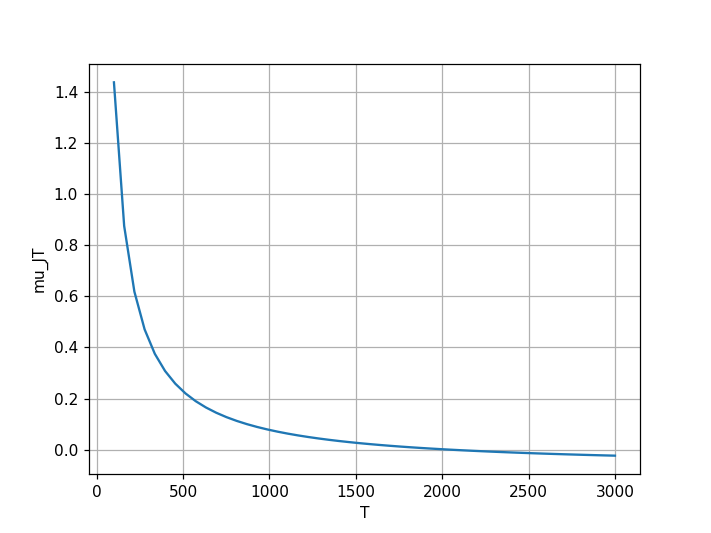

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Text(0, 0.5, 'mu_JT')

In [6]:
### BEGIN SOLUTION ###

# a = AssignQuantity(1.370,'L^2 bar / mol^2'); print(a)
# b = AssignQuantity(0.0387,'L /mol'); print(b)
# For CO2
a = AssignQuantity(3.64,'L^2 bar / mol^2'); print('a =', a)
b = AssignQuantity(0.04267,'L /mol'); print('b =', b)

# Other parameters
R = AssignQuantity(8.314,'J/mol/K'); print('R =', R)
T = AssignQuantity(np.linspace(100,3000),'K'); print(T.units)
n = AssignQuantity(1,'mol'); print('n =', n)

# Calculate mu_T
term1 = b; print('term1 =', term1.units)
term2 = 2*a/(R*T); term2.ito('liter/mol'); print('term2 =', term2.units)
mu_T = term1 - term2; print('units of mu_T', mu_T.units)

# Calculate and plot mu_JT
Cp = AssignQuantity(58,'J/mol/K')
mu_JT = -mu_T/Cp; print('units of mu_JT', mu_JT.units)
mu_JT.ito('K/bar'); print('mu_JT units =', mu_JT.units)
plt.figure()
plt.plot(T,mu_JT)
plt.grid(True)
plt.xlabel("T")
plt.ylabel("mu_JT")

### END SOLUTION ###